## **1. Model Framework Setup**

In [0]:
# The cuda environment here should be run with GPU

In [1]:
# connect to personal google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# for first run only

# download cuDNN which compiles darknet, download website: http://bit.ly/2qfpOPj
# put the file 'cudnn-10.0-linux-x64-v7.5.0.56.solitairetheme8' under your personal google drive 
# file location: (your personal google drive)/darkent/cuDNN/(file)
!tar -xzvf /content/gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.solitairetheme8 -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# check whether the installation succeed or not
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [2]:
# get darknet and start to compile
%cd /content/
!git clone https://github.com/kriyeng/darknet/ darknet_source
%cd darknet_source

# Revise darknet setting to fit in google colab environment
!sed -i "s/GPU=0/GPU=1/g" Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" Makefile

# compile
!make

/content
Cloning into 'darknet_source'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 9.95 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (6760/6760), done.
/content/darknet_source
mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(mat_cv*, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:896:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-confi

In [0]:
# copy compiled darknet file from darknet_source folder(./ means current working directory) to content folder
# %cd /content/darknet_source
# !cp ./darknet /content/darknet 

# compile only needs to be done one time if we save the file in our google drive, we can just copy the file(darknet) from google drive next time (!cp + file path(original)/file name + file path(copy))
!cp /content/gdrive/My\ Drive/darknet/darknet /content/darknet

In [0]:
# download yolov3.weights (fine-tune weights)
# %cd /content/darknet_source
# !wget https://pjreddie.com/media/files/yolov3.weights

# after 1st time download(and save the file in google drive), we just copy the file(yolov3.weights) from our google drive which is much faster
!cp /content/gdrive/My\ Drive/VOCdevkit/VOC2012/SampleData/yolov3.weights /content/darknet_source

In [0]:
# test whether the compiled darknet and yolov3 weights work
!chmod +x /content/darknet
%cd /content/darknet_source
# !/content/darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont-show
!/content/darknet detect cfg/yolo-obj.cfg yolo-obj_last.weights data/person.jpg -dont-show

/content/darknet_source
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  

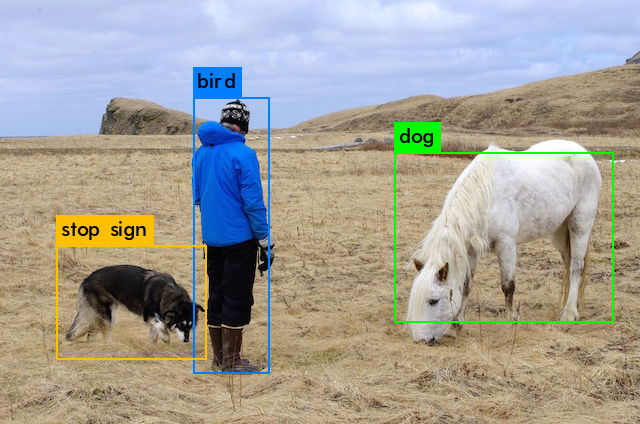

In [0]:
# show the test prediction image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [0]:
# Reference
# https://medium.com/@upchen_/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E5%AE%89%E8%A3%9D-darknet-%E6%A1%86%E6%9E%B6%E8%A8%93%E7%B7%B4-yolo-v3-%E7%89%A9%E4%BB%B6%E8%BE%A8%E8%AD%98%E4%B8%A6%E4%B8%94%E6%9C%80%E4%BD%B3%E5%8C%96-colab-%E7%9A%84%E8%A8%93%E7%B7%B4%E6%B5%81%E7%A8%8B-e5ded7bbab00
# https://colab.research.google.com/drive/1C9SwG5rrfhjsZtRlrftLiUXhRZep3qA_#scrollTo=pOCRr9LtBVbG

## **2. Custom Dataset**

In [0]:
# drive.mount('/content/gdrive', force_remount=True) # force_remount will sync google drive again for latest files

Mounted at /content/gdrive


In [0]:
!pwd

/content/darknet_source


In [5]:
%cd /content
!wget 'http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar'

/content
--2020-04-22 22:43:14--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  9.44MB/s    in 3m 25s  

2020-04-22 22:46:39 (9.31 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [0]:
!tar -xf /content/VOCtrainval_11-May-2012.tar

In [0]:
# !mkdir /content/VOCdevkit # make a folder
# !cp -av /content/gdrive/My\ Drive/VOCdevkit/VOC2012 /content/VOCdevkit # -av for copying whole folder (but it takes forever, just load from google drive)

In [7]:
# load sample codes
%cd /content
!git clone https://github.com/wallat/train_yolo_with_custom_dataset_on_colab_101.git

/content
Cloning into 'train_yolo_with_custom_dataset_on_colab_101'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 23 (delta 4), reused 19 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [0]:
# clean and create folders

import os
import shutil

shutil.rmtree("/content/VOCdevkit/VOC2012/cfg", ignore_errors=True)
os.makedirs("/content/VOCdevkit/VOC2012/cfg", exist_ok=True)

shutil.rmtree("/content/VOCdevkit/VOC2012/yolos", ignore_errors=True)
os.makedirs("/content/VOCdevkit/VOC2012/yolos", exist_ok=True)

os.makedirs("/content/gdrive/My Drive/train_yolo_with_custom_dataset_on_colab_101".replace("\ ", " "), exist_ok=True)
os.makedirs("/content/app/cfg", exist_ok=True)
os.makedirs("/content/app/weights", exist_ok=True)

In [9]:
# get total class information

# import glob
# import os
# import re

# classes = set()
# for path in glob.glob(os.path.join("/content/gdrive/My Drive/VOCdevkit/VOC2012/Annotations", "*.xml")):
#     with open(path, 'r') as f:
#         content = f.read()

#     # extract class names
#     matches = re.findall(r'<name>([\w_]+)<\/name>', content, flags=0) # this will count the body part of human as well
#     classes.update(matches) # matches could be so many classes at one time

# classes = ('aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
#               'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor')

classes = ('car', 'chair', 'person')

# write class into file
with open(os.path.join("/content/app/cfg", "obj.names"), 'w') as f:
    f.write("\n".join(classes))

print('Read in %d classes: %s' % (len(classes), ", ".join(classes)))

Read in 3 classes: car, chair, person


In [0]:
!cp /content/VOCdevkit/VOC2012/JPEGImages/* /content/VOCdevkit/VOC2012/yolos

In [12]:
# convert VOC xml into YOLO format

import sys
sys.path.append("/content/train_yolo_with_custom_dataset_on_colab_101")

from Format import VOC, YOLO # VOC and YOLO are the class in Format.py

voc = VOC()
yolo = YOLO(os.path.join("/content/app/cfg", "obj.names")) # 20 classes (self defined)

flag, data = voc.parse("/content/VOCdevkit/VOC2012/Annotations") # seems this is working with parse and generate function while not from google drive
# flag, data = voc.parse("/content/gdrive/My Drive/VOCdevkit/VOC2012/Annotations")
flag, data = yolo.generate(data)
flag, data = yolo.save(data,
                            save_path="/content/VOCdevkit/VOC2012/yolos",
                            img_path="/content/VOCdevkit/VOC2012/JPEGImages", img_type=".jpg", manipast_path="./")
# flag, data = yolo.save(data,
#                             save_path="/content/VOCdevkit/VOC2012/yolos",
#                             img_path="/content/gdrive/My Drive/VOCdevkit/VOC2012/JPEGImages", img_type=".jpg", manipast_path="./")

l ['car', 'chair', 'person']

VOC Parsing:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Generating:|----------------------------------------| 0.0% (1/17125)  Complete


In [0]:
# create the cfg file
!cp /content/train_yolo_with_custom_dataset_on_colab_101/darknet_cfg/yolov3.cfg /content/app/cfg/yolov3.cfg

In [0]:
# fetch class_names
with open(os.path.join("/content/app/cfg", "obj.names"), 'r') as f:
  f_content = f.read()
class_names = f_content.strip().splitlines()

In [0]:
# update the cfg file
# with open(os.path.join("/content/app/cfg", "yolo-obj.cfg"), 'r') as f:
#   content = f.read()
# with open(os.path.join("/content/app/cfg", "yolo-obj.cfg"), 'w') as f:
#   num_max_batches = len(class_names)*2000
#   content = content.replace("%NUM_CLASSES%", str(len(class_names)))
#   content = content.replace("%NUM_MAX_BATCHES%", str(num_max_batches))
#   content = content.replace("%NUM_MAX_BATCHES_80%", str(int(num_max_batches*0.8)))
#   content = content.replace("%NUM_MAX_BATCHES_90%", str(int(num_max_batches*0.9)))
#   content = content.replace("%NUM_CONVOLUTIONAL_FILTERS%", str((len(class_names)+5)*3))

#   f.write(content)

In [0]:
# create train and test files
import random
import glob

txt_paths = glob.glob(os.path.join("/content/VOCdevkit/VOC2012/yolos", "*.txt"))

random.seed(4)
random.shuffle(txt_paths)
num_train_images = int(len(txt_paths)*0.7)

In [15]:
num_train_images

11987

In [0]:
# remember to replace the original train and text files
assert num_train_images>0, "There's no training images in folder %s" % ("/content/VOCdevkit/VOC2012/yolos")

with open(os.path.join("/content/app/cfg", "train.txt"), 'w') as f:
  for path in txt_paths[:num_train_images]:
    f.write("%s/%s\n" % ("/content/VOCdevkit/VOC2012/yolos", os.path.basename(path).replace(".txt", ".jpg")))
with open(os.path.join("/content/app/cfg", "test.txt"), 'w') as f:
  for path in txt_paths[num_train_images:]:
    f.write("%s/%s\n" % ("/content/VOCdevkit/VOC2012/yolos", os.path.basename(path).replace(".txt", ".jpg")))

# create obj
with open(os.path.join("/content/app/cfg", "obj.data"), 'w') as f:
  f.write("classes=%d\n" % (len(class_names)))
  f.write("train=%s/train.txt\n" % ("/content/app/cfg"))
  f.write("valid=%s/test.txt\n" % ("/content/app/cfg"))
  f.write("names=%s/obj.names\n" % ("/content/app/cfg"))
  f.write("backup=%s\n" % ("/content/app/weights"))

In [0]:
# use the pre-trained weights to speed up the training speed
# !wget https://pjreddie.com/media/files/darknet53.conv.74

# or copy pre-downloaded file from google drive 
!cp /content/gdrive/My\ Drive/VOCdevkit/VOC2012/SampleData/darknet53.conv.74 /content
!chmod +x /content/darknet53.conv.74

In [23]:
# train the model

# 1. train from YOLO pre-trained one (but this seems slower?)
!chmod +x /content/darknet
# !/content/darknet detector train /content/app/cfg/obj.data /content/app/cfg/yolo-obj.cfg /content/darknet53.conv.74 -dont_show | grep "avg loss"
!/content/darknet detector train /content/app/cfg/obj.data /content/app/cfg/yolo-obj.cfg /content/darknet53.conv.74 -dont_show -json_port 8070 -mjpeg_port 8090 -ext_output

# 2. train from scratch or continue training from last record
# !chmod +x /content/darknet
# !/content/darknet detector train /content/app/cfg/obj.data /content/app/cfg/yolo-obj.cfg /content/app/weights/yolo-obj_7000.weights -dont_show | grep "avg loss"

Streaming output truncated to the last 5000 lines.

 929: 2.262848, 1.788867 avg loss, 0.000745 rate, 2.771415 seconds, 59456 images
 MJPEG-stream sent. 
Loaded: 0.000059 seconds
Region 82 Avg IOU: 0.741914, Class: 0.283268, Obj: 0.160527, No Obj: 0.002780, .5R: 1.000000, .75R: 0.400000,  count: 5
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000347, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000024, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.658079, Class: 0.523373, Obj: 0.300920, No Obj: 0.003002, .5R: 1.000000, .75R: 0.166667,  count: 6
Region 94 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000305, .5R: -nan, .75R: -nan,  count: 0
Region 106 Avg IOU: -nan, Class: -nan, Obj: -nan, No Obj: 0.000018, .5R: -nan, .75R: -nan,  count: 0
Region 82 Avg IOU: 0.661410, Class: 0.317933, Obj: 0.086341, No Obj: 0.003137, .5R: 0.888889, .75R: 0.333333,  count: 9
Region 94 Avg IOU: 0.560053, Class: 0.159409, Obj: 0.007169

In [0]:
!/content/darknet detector map /content/app/cfg/obj.data /content/app/cfg/yolo-obj.cfg /content/app/weights/yolo-obj_7000.weights -points 0 -thresh 0.5 -iou_thresh 0.5
# https://blog.csdn.net/sunqiande88/article/details/101640358

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

In [0]:
!mkdir /content/VOCdevkit/VOC2012/image_detection
!cp /content/VOCdevkit/VOC2012/JPEGImages/2007_000129.jpg /content/VOCdevkit/VOC2012/image_detection
!cp /content/VOCdevkit/VOC2012/JPEGImages/2007_005264.jpg /content/VOCdevkit/VOC2012/image_detection
!cp /content/VOCdevkit/VOC2012/JPEGImages/2008_000491.jpg /content/VOCdevkit/VOC2012/image_detection
!cp /content/VOCdevkit/VOC2012/JPEGImages/2008_000676.jpg /content/VOCdevkit/VOC2012/image_detection
!cp /content/VOCdevkit/VOC2012/JPEGImages/2008_001235.jpg /content/VOCdevkit/VOC2012/image_detection

fpath /content/VOCdevkit/VOC2012/image_detection/2008_001235.jpg


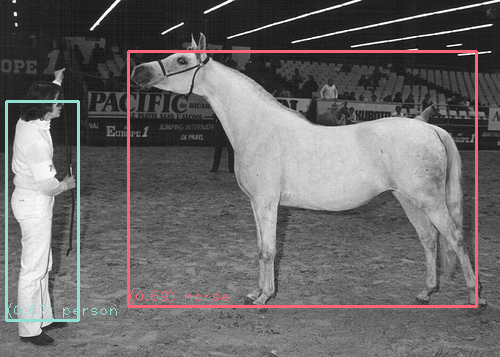

fpath /content/VOCdevkit/VOC2012/image_detection/2008_000491.jpg


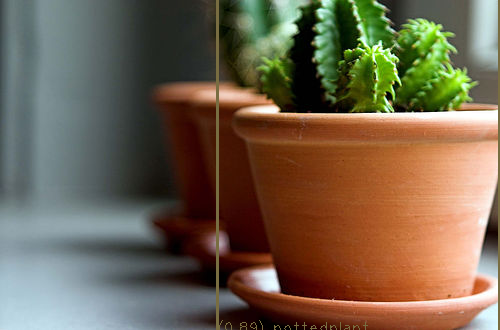

fpath /content/VOCdevkit/VOC2012/image_detection/2008_000676.jpg


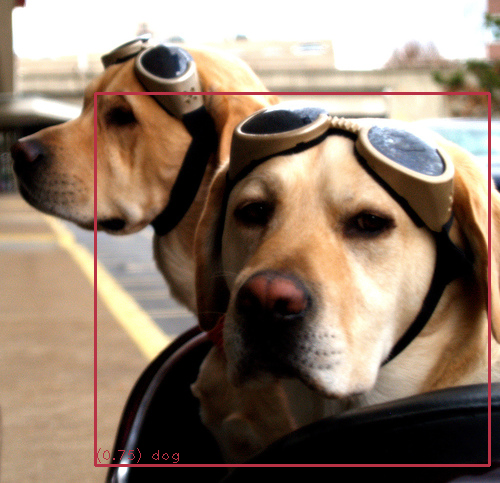

fpath /content/VOCdevkit/VOC2012/image_detection/2007_005264.jpg


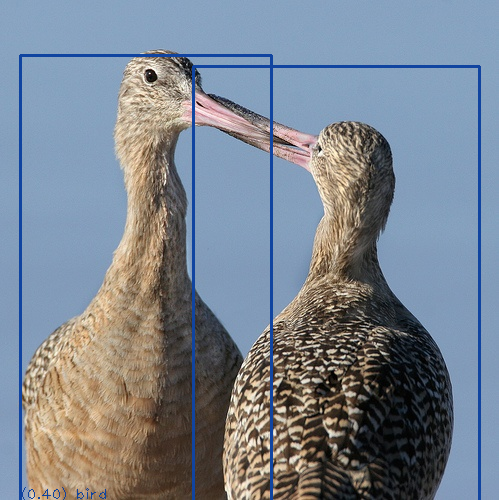

fpath /content/VOCdevkit/VOC2012/image_detection/2007_000129.jpg


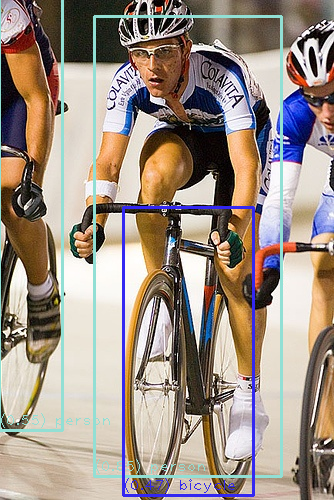

In [0]:
# Use python to read 

import os
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

import pprint
pp = pprint.PrettyPrinter(indent=4)


def detecting_one_image(net, output_layers, img):
  # Detecting objects
  # cv::dnn::blobFromImage (InputArray image, double scalefactor=1.0, const Size &size=Size(), const Scalar &mean=Scalar(), bool swapRB=false, bool crop=false, int ddepth=CV_32F)
  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)

  return outs

# Load Yolo
net = cv2.dnn.readNet("/content/app/weights/yolo-obj_7000.weights", "/content/app/cfg/yolo-obj.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Load label names
with open("/content/app/cfg/obj.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]

# Generate display colors
colors = np.random.uniform(0, 255, size=(len(classes), 3))

for fpath in glob.glob(os.path.join("/content/VOCdevkit/VOC2012/image_detection", "*.jpg")): # change path(copy)
  print("fpath", fpath)

  # Loading image
  img = cv2.imread(fpath)
  height, width, channels = img.shape

  if width>800: # resize for display purpose
    dim = (800, int(800*height/width))
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    height, width, channels = img.shape

  outs = detecting_one_image(net, output_layers, img)

  # Showing informations on the screen
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores[class_id]
      if confidence > 0.3:
        # Object detected
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)

        # Rectangle coordinates
        x = int(center_x - w / 2)
        y = int(center_y - h / 2)

        label = "(%.2f) %s" % (confidence, classes[class_id])

        cv2.rectangle(img, (x, y), (x + w, y + h), colors[class_id], 2)
        cv2.putText(img, label, (x, y+h-5), cv2.FONT_HERSHEY_PLAIN, 1, colors[class_id], 1)

  cv2_imshow(img)

In [0]:
1. test set 
2. plot training process